# 근이완제 라벨링

In [14]:
FOLDER_ROOT = 'C:/Users/kjh97/prac/'
sample = FOLDER_ROOT + 'train/circle/Soxazone.png'
FOLDER_CIRCLE = FOLDER_ROOT + 'train/circle//*.png'
FOLDER_ELLIPSE = FOLDER_ROOT +  'train/ellipse/*.png'
FOLDER_TEST = FOLDER_ROOT + 'test/*.png'

In [2]:
import tensorflow as tf
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob
import matplotlib.pyplot as plt

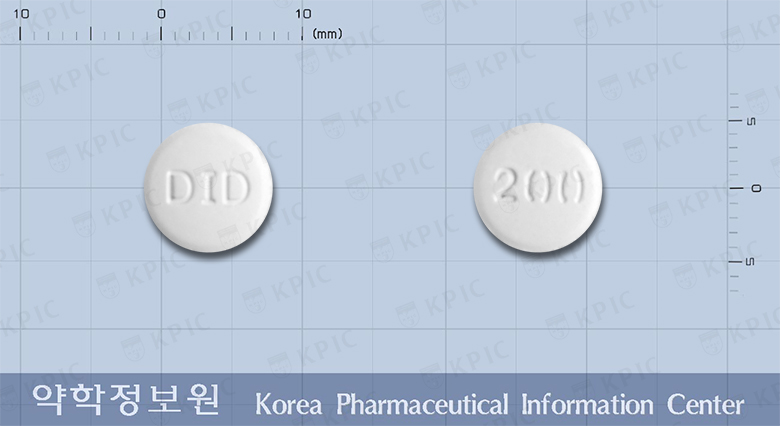

In [3]:
image = Image.open(sample)
image

In [4]:
data = np.array(image)
data.shape

(426, 780, 4)

In [5]:
def shift_w(folder):
    path_train = glob.glob(folder)
    for i in range (len(path_train)):
        path_img = path_train[i]
        image = Image.open(path_img)
        arr = np.array(image)
        path = np.expand_dims(arr, 0)
        datagen = ImageDataGenerator(width_shift_range =[-200,200])
        it = datagen.flow(path, batch_size=1)
        fig = plt.figure(figsize = (30,30))
        for i in range(9):
            plt.subplot(3, 3, i+1)
        
            batch = it.next()
            img = batch[0].astype('uint8')
            plt.imshow(img)
            return img

In [20]:
def shift_h(folder):
    path_train = glob.glob(folder)
    for i in range (len(path_train)):
        path_img = path_train[i]
        image = Image.open(path_img)
        arr = np.array(image)
        datagen = ImageDataGenerator(height_shift_range =0.5)
        it = datagen.flow(arr, batch_size=1)
        fig = plt.figure(figsize = (30,30))
        training_set = train_datagen.flow_from_directory('prac/train',
                                                         target_size = (64,64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')
        for i in range(9):
            plt.subplot(3, 3, i+1)
            
            batch = it.next()
            img = batch[0].astype('uint8')
            plt.imshow(img)
            return img

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (426, 780, 4))

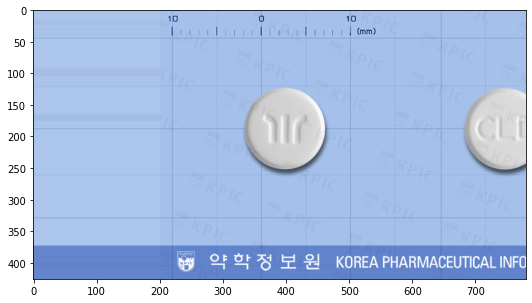

In [21]:
wdata = shift_w(FOLDER_CIRCLE)
hdata = shift_h(FOLDER_CIRCLE)

In [18]:
def parse_folder(folder):
    path_train = glob.glob(folder)
    class_str =['circle','ellipse']
    list_x =[]
    list_y =[]
    print(len(path_train))
    for i in range(len(path_train)):
        path_img = path_train[i]
        image = Image.open(path_img)
        arr = np.array(image)
        list_x.append(arr)
        
        start = path_img.index('_')
        end = path_img.index('.png')
        label = path_img[start+1:end]
        label_index = class_str.index(label)
        list_y.append(label_index)
        
    return np.array(list_x), np.array(list_y) 

In [19]:
train_x, train_y = parse_folder(FOLDER_CIRCLE)

3


ValueError: substring not found

In [17]:
train_x.shape, train_y.shape

((0,), (0,))